# Gradient Descent Algorithm for Linear Regression

In [19]:
# Importing NumPy & PyPlot from Matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Calculating the gradients for a linear regression $y = ax + b$

In linear regression, the model targets to get the best-fit regression line to predict the value of $y$ based on the given input value, $x$. While training the model, the model calculates the loss using Squared Loss function which measures the Mean Squared Error between the predicted value $f_{a,b}(x)$ and true value $y$. The model targets to minimize this loss function.

`Hypothesis` : $f_{a,b}(x) = ax + b$ <br>
`Parameters` : $(a, b)$ <br>
`Loss Function` : $L(a,b) = 1/N \sum_{i = 0}^N (y - f_{a,b}(x))^2$ <br>
`Goal` : $minimize_{a,b} L(a,b)$ <br>

## Gradient of the loss function is derived as follows:

$$f_{a,b}(x) = ax + b$$
$$L(a,b) = \frac{1}{N}\ \sum_{i=0}^N\ (y_i - f_{a,b}(x_i))^2$$
Taking partial derivative w.r.t $a$ on both sides,
$$\frac{\delta L(a,b)}{\delta a} = \frac{2}{N}\ \sum_{i=0}^N\ (y_i - f_{a,b}(x_i))(-\frac{\delta f_{a,b}(x_i)} {\delta a}) = \frac{2}{N}\ \sum_{i=0}^N\ (y_i - f_{a,b}(x_i))(-\frac{\delta(ax_i + b)}{\delta a})$$ 
$$\frac{\delta L(a,b)}{\delta a} = \frac{2}{N}\ \sum_{i=0}^N\ (y_i - f_{a,b}(x_i))(-x_i)) = \frac{-2}{N}\ \sum_{i=0}^N\ x_i(y_i - f_{a,b}(x_i))$$
Therefore, `grad_a` : $\frac{\delta L(a,b)}{\delta a} = \frac{-2}{N}\ \sum_{i=0}^N\ x_i(y_i - f_{a,b}(x_i))$ <br><br>
Similarly, `grad_b` : $\frac{\delta L(a,b)}{\delta b} = \frac{-2}{N}\ \sum_{i=0}^N\ (y_i - f_{a,b}(x_i))$ <br>

To minimize the loss function, the Gradient Descent Algorithm is used which iteratively finds the point of minima using gradients.

In [20]:
# Takes arrays X and y along with corresponding parameters a as w[0] and b as w[1]
def gradient(X, y, w):
    # Number of datapoints
    n = len(X)
    a = w[0]
    b = w[1]

    # Predicting the values of y according to the hypothesis y = aX + b for every value of X
    y_pred = a*X + b

    # Calculating the gradient for parameter a
    grad_a = (-2/n) * sum(X * (y - y_pred))

    # Calculating the gradient for parameter b
    grad_b = (-2/n) * sum(y - y_pred)

    #Returns a pair of gradients for 'a' and 'b' respectively
    return np.array([grad_a, grad_b])

# Takes arrays X and y along with corresponding parameters to compute the Loss as Mean Squared Error
def loss(X, y, w):
    y_pred = w[0]*X + w[1]
    J = np.mean((y-y_pred)**2)
    return J

## Defining function for implementing gradient descent algorithm

In [21]:
# Returns the optimal parameters relating X with y given initial parameter values and learning rate
def gradient_descent(X, y, gradient, init_, learn_rate, n_iter = 50, tol = 1e-06, *args):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    gradient = Function which gives the gradient of the loss function for some values of weights
    init_ = Initial value of weights
    learn_rate  = Learnig rate parameter which controls how much the weights change at each iteration
    n_iter = Maximum number of iterations
    tol = Tolerance limit at which alogrithm stops

    Returns optimal weight vector & error(loss) history
    '''

    # Seting the initial value of parameter & error list
    w = init_
    error_list = []

    for _ in range(n_iter):
        # Calculating step as the product of gradient and step size
        delta = -learn_rate * gradient(X, y, w)

        # Tolerance check
        if np.all(np.abs(delta) <= tol):
            break

        # Updating parameter value
        w = w + delta

        # Calculating Mean Squared Error at current values of parameters and adding it to history
        error_list.append(loss(X, y, w))
    
    # Returning the rounded off value
    return np.round(w*1000)/1000, error_list
    

## Generating artificial training data for gradient descent linear regression model

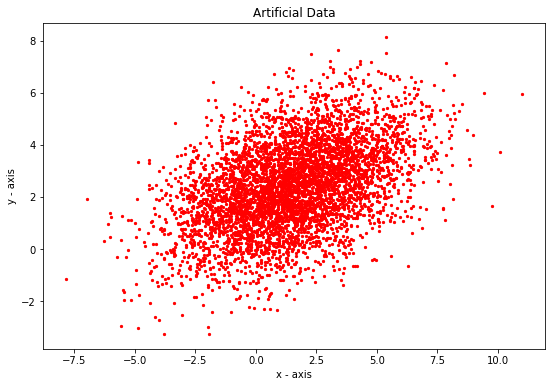

In [22]:
np.random.seed(0)

# Initialising an array of 5000 values with mean = 1.5 & standard deviation = 2.5
X = 2.5 * np.random.randn(5000) + 1.5

# Generating 5000 residual terms
res = 1.5 * np.random.randn(5000)

# Actual values of y
y = 2 + 0.3 * X + res

# Plotting the points generated
plt.figure(figsize=(9,6))
plt.scatter(X, y, marker='.', s=20, color='r')
plt.title('Artificial Data')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()

## Training the model on data generated (X, y)

Optimal parameters a and b relating X and y are 0.301 and 1.964


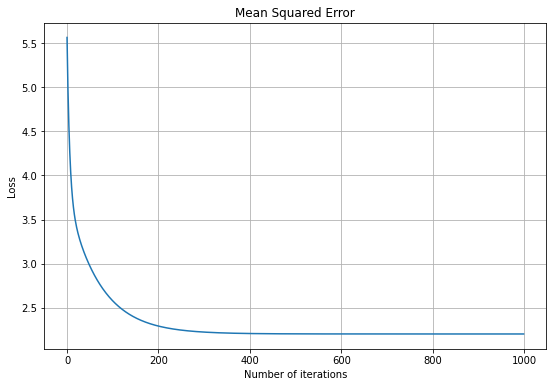

In [23]:
# Passing random initial parameter values learning rate as 0.005 and max number of iterations as 1000
w, error_list = gradient_descent(X, y, gradient, init_ = np.random.rand(2), learn_rate=0.005, n_iter=1000)
print('Optimal parameters a and b relating X and y are', w[0], 'and', w[1])

# Visualising  the loss function of GD
plt.figure(figsize=(9,6))
plt.title('Mean Squared Error')
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.plot(error_list)
plt.show()

The above plot shows that after 500 iterations of standard gradient descent Loss(Mean Squared Error) doesn't reduce further and has converged to its minimum. Hence, it can be concluded that 500 iterations of statdard gradient descent are enough to find the optimal parameter values for given dataset at a learning rate of $0.005$.

## Plotting the linear function for parameters obtained

/tmp/ipykernel_327/3842853207.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X, (lambda x: w[0]*x + w[1])(X), COLOR='b')


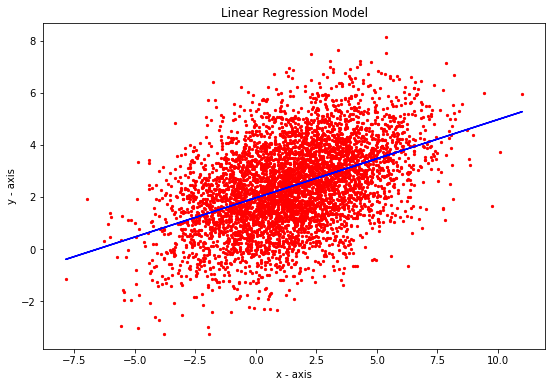

In [24]:
plt.figure(figsize=(9,6))
plt.title('Linear Regression Model')
plt.xlabel('x - axis')
plt.ylabel('y - axis')

# Plotting the values of y against X
plt.scatter(X, y, marker='.', s=20, color='r')

# Plotting the linear function with optimal parameters for X and y
plt.plot(X, (lambda x: w[0]*x + w[1])(X), COLOR='b')

plt.show()